In [ ]:
import torch
from torch import Tensor, nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

from optimizers.optim import SGD, SGDMomentum, RMSProp, Adam # this is my optim, not torch's optim

In [ ]:
def test_optimizers(seed=0):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
    train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

    class Net(nn.Module):
        def __init__(self):
            super().__init__()
            self.fc1 = nn.Linear(28*28, 128)
            self.relu = nn.ReLU()
            self.fc2 = nn.Linear(128, 10)

        def forward(self, x):
            x = x.view(x.size(0), -1)
            return self.fc2(self.relu(self.fc1(x)))

    step_losses = {}  # Changed from losses to step_losses
    optim_classes = {
        "SGD": lambda params: SGD(list(params), learning_rate=0.001),
        "Momentum": lambda params: SGDMomentum(list(params), learning_rate=0.001, beta=0.9),
        "RMSProp": lambda params: RMSProp(list(params), learning_rate=0.001, beta2=0.99),
        "Adam": lambda params: Adam(list(params), learning_rate=0.001, beta1=0.9, beta2=0.999)
    }

    for name, opt_fn in optim_classes.items():
        print(f"\n=== Testing {name} ===")
        torch.manual_seed(seed)
        model = Net()
        criterion = nn.CrossEntropyLoss()
        optimizer = opt_fn(model.parameters())

        step_losses[name] = []  # Track per-step losses
        step_count = 0
        
        for epoch in range(10):
            epoch_losses = []
            for images, labels in train_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)

                # backward
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

                # Store per-step loss
                step_loss = loss.item()
                step_losses[name].append(step_loss)
                epoch_losses.append(step_loss)
                step_count += 1

            # Print epoch summary
            avg_epoch_loss = sum(epoch_losses) / len(epoch_losses)
            print(f"Epoch {epoch+1}: Avg Loss = {avg_epoch_loss:.4f}, Steps = {len(epoch_losses)}")

    return step_losses


results = test_optimizers()
print(f"\nTotal steps per optimizer: {len(list(results.values())[0])}")
print("Final step losses:")
for name, losses in results.items():
    print(f"  {name}: {losses[-1]:.4f}")


=== Testing SGD ===
Epoch 1: Avg Loss = 1.8967, Steps = 938
Epoch 2: Avg Loss = 1.2041, Steps = 938
Epoch 3: Avg Loss = 0.8307, Steps = 938
Epoch 4: Avg Loss = 0.6590, Steps = 938
Epoch 5: Avg Loss = 0.5671, Steps = 938
Epoch 6: Avg Loss = 0.5110, Steps = 938
Epoch 7: Avg Loss = 0.4733, Steps = 938
Epoch 8: Avg Loss = 0.4461, Steps = 938
Epoch 9: Avg Loss = 0.4255, Steps = 938
Epoch 10: Avg Loss = 0.4093, Steps = 938

=== Testing Momentum ===
Epoch 1: Avg Loss = 0.7702, Steps = 938
Epoch 2: Avg Loss = 0.3672, Steps = 938
Epoch 3: Avg Loss = 0.3209, Steps = 938
Epoch 4: Avg Loss = 0.2943, Steps = 938
Epoch 5: Avg Loss = 0.2722, Steps = 938
Epoch 6: Avg Loss = 0.2533, Steps = 938
Epoch 7: Avg Loss = 0.2358, Steps = 938
Epoch 8: Avg Loss = 0.2202, Steps = 938
Epoch 9: Avg Loss = 0.2068, Steps = 938
Epoch 10: Avg Loss = 0.1950, Steps = 938

=== Testing RMSProp ===
Epoch 1: Avg Loss = 0.4029, Steps = 938
Epoch 2: Avg Loss = 0.2088, Steps = 938
Epoch 3: Avg Loss = 0.1512, Steps = 938
Epoch 

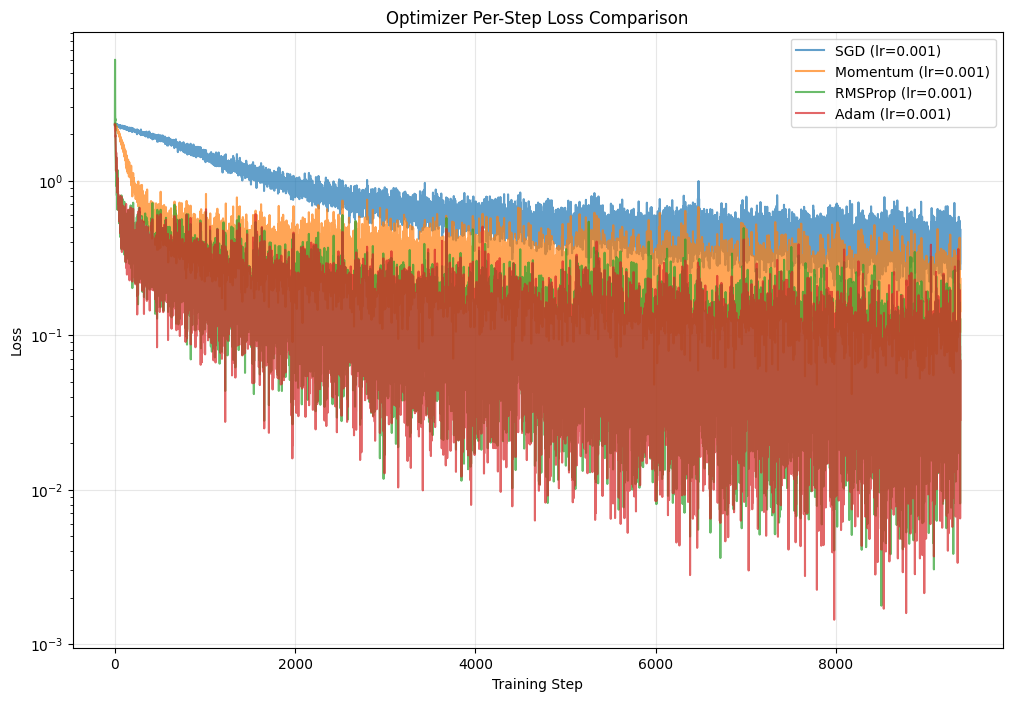

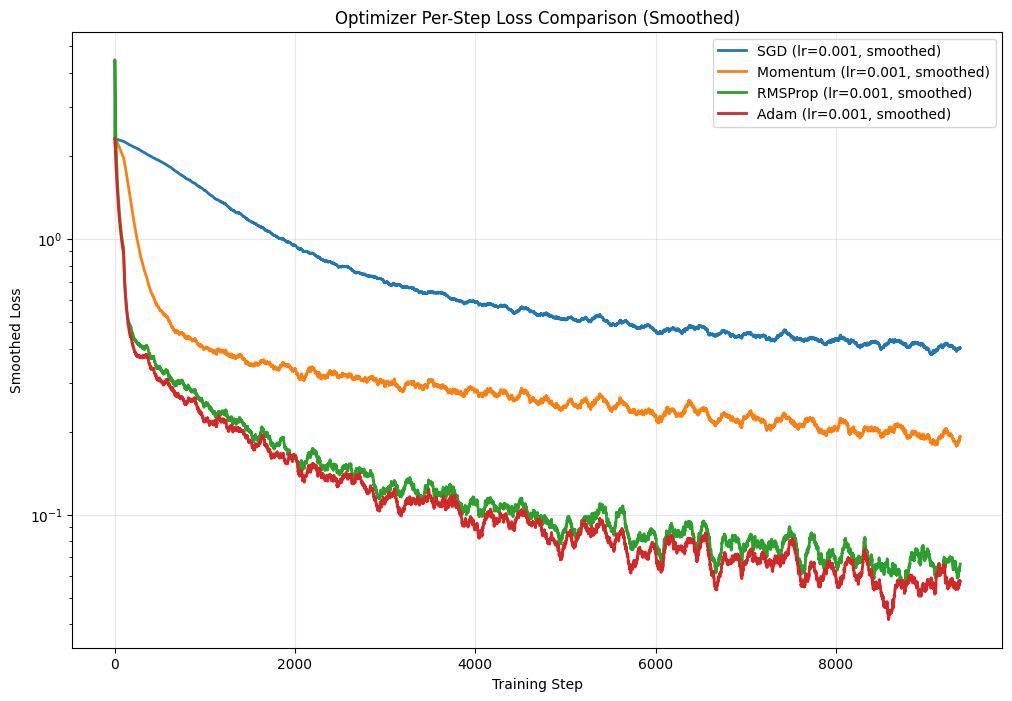

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

# Learning rates for each optimizer (matching the test function)
learning_rates = {
    "SGD": 0.001,
    "Momentum": 0.001,
    "RMSProp": 0.001,
    "Adam": 0.001
}

# Plot per-step losses
for name, loss_list in results.items():
    lr = learning_rates.get(name, "unknown")
    plt.plot(range(1, len(loss_list) + 1), loss_list, label=f'{name} (lr={lr})', alpha=0.7)

plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.title('Optimizer Per-Step Loss Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Use log scale to better visualize the convergence
plt.show()

# Also create a smoothed version for better visualization
plt.figure(figsize=(12, 8))

def smooth_losses(losses, window=100):
    """Apply moving average smoothing"""
    if len(losses) < window:
        return losses
    smoothed = []
    for i in range(len(losses)):
        start_idx = max(0, i - window + 1)
        smoothed.append(sum(losses[start_idx:i+1]) / (i - start_idx + 1))
    return smoothed

for name, loss_list in results.items():
    lr = learning_rates.get(name, "unknown")
    smoothed = smooth_losses(loss_list)
    plt.plot(range(1, len(smoothed) + 1), smoothed, label=f'{name} (lr={lr}, smoothed)', linewidth=2)

plt.xlabel('Training Step')
plt.ylabel('Smoothed Loss')
plt.title('Optimizer Per-Step Loss Comparison (Smoothed)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

In [ ]:
def test_optimizers(seed=0):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
    train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

    class Net(nn.Module):
        def __init__(self):
            super().__init__()
            self.fc1 = nn.Linear(28*28, 128)
            self.relu = nn.ReLU()
            self.fc2 = nn.Linear(128, 10)

        def forward(self, x):
            x = x.view(x.size(0), -1)
            return self.fc2(self.relu(self.fc1(x)))

    step_losses = {}  # Changed from losses to step_losses
    optim_classes = {
        "SGD": lambda params: SGD(list(params), learning_rate=0.01),
        "Momentum": lambda params: SGDMomentum(list(params), learning_rate=0.01, beta=0.9),
        "RMSProp": lambda params: RMSProp(list(params), learning_rate=0.001, beta2=0.99),
        "Adam": lambda params: Adam(list(params), learning_rate=0.001, beta1=0.9, beta2=0.999)
    }

    for name, opt_fn in optim_classes.items():
        print(f"\n=== Testing {name} ===")
        torch.manual_seed(seed)
        model = Net()
        criterion = nn.CrossEntropyLoss()
        optimizer = opt_fn(model.parameters())

        step_losses[name] = []  # Track per-step losses
        step_count = 0
        
        for epoch in range(10):
            epoch_losses = []
            for images, labels in train_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)

                # backward
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

                # Store per-step loss
                step_loss = loss.item()
                step_losses[name].append(step_loss)
                epoch_losses.append(step_loss)
                step_count += 1

            # Print epoch summary
            avg_epoch_loss = sum(epoch_losses) / len(epoch_losses)
            print(f"Epoch {epoch+1}: Avg Loss = {avg_epoch_loss:.4f}, Steps = {len(epoch_losses)}")

    return step_losses


results = test_optimizers()
print(f"\nTotal steps per optimizer: {len(list(results.values())[0])}")
print("Final step losses:")
for name, losses in results.items():
    print(f"  {name}: {losses[-1]:.4f}")


=== Testing SGD ===
Epoch 1: Avg Loss = 0.7501, Steps = 938
Epoch 2: Avg Loss = 0.3669, Steps = 938
Epoch 3: Avg Loss = 0.3211, Steps = 938
Epoch 4: Avg Loss = 0.2939, Steps = 938
Epoch 5: Avg Loss = 0.2722, Steps = 938
Epoch 6: Avg Loss = 0.2530, Steps = 938
Epoch 7: Avg Loss = 0.2354, Steps = 938
Epoch 8: Avg Loss = 0.2202, Steps = 938
Epoch 9: Avg Loss = 0.2063, Steps = 938
Epoch 10: Avg Loss = 0.1944, Steps = 938

=== Testing Momentum ===
Epoch 1: Avg Loss = 0.3695, Steps = 938
Epoch 2: Avg Loss = 0.1818, Steps = 938
Epoch 3: Avg Loss = 0.1344, Steps = 938
Epoch 4: Avg Loss = 0.1077, Steps = 938
Epoch 5: Avg Loss = 0.0896, Steps = 938
Epoch 6: Avg Loss = 0.0789, Steps = 938
Epoch 7: Avg Loss = 0.0703, Steps = 938
Epoch 8: Avg Loss = 0.0621, Steps = 938
Epoch 9: Avg Loss = 0.0574, Steps = 938
Epoch 10: Avg Loss = 0.0517, Steps = 938

=== Testing RMSProp ===
Epoch 1: Avg Loss = 0.4029, Steps = 938
Epoch 2: Avg Loss = 0.2088, Steps = 938
Epoch 3: Avg Loss = 0.1512, Steps = 938
Epoch 

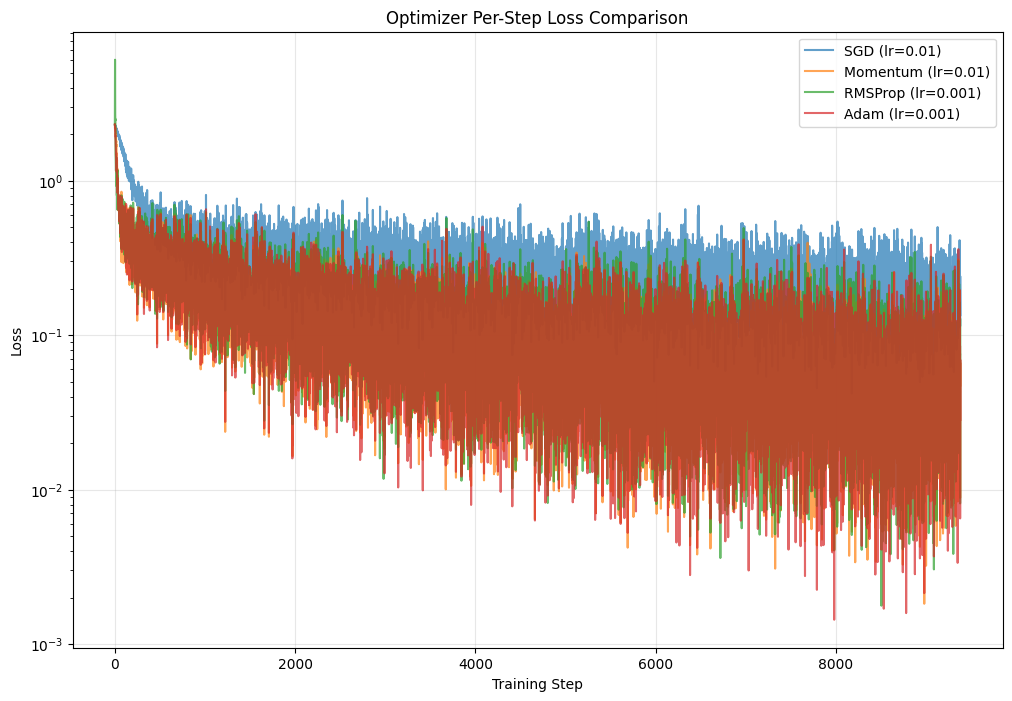

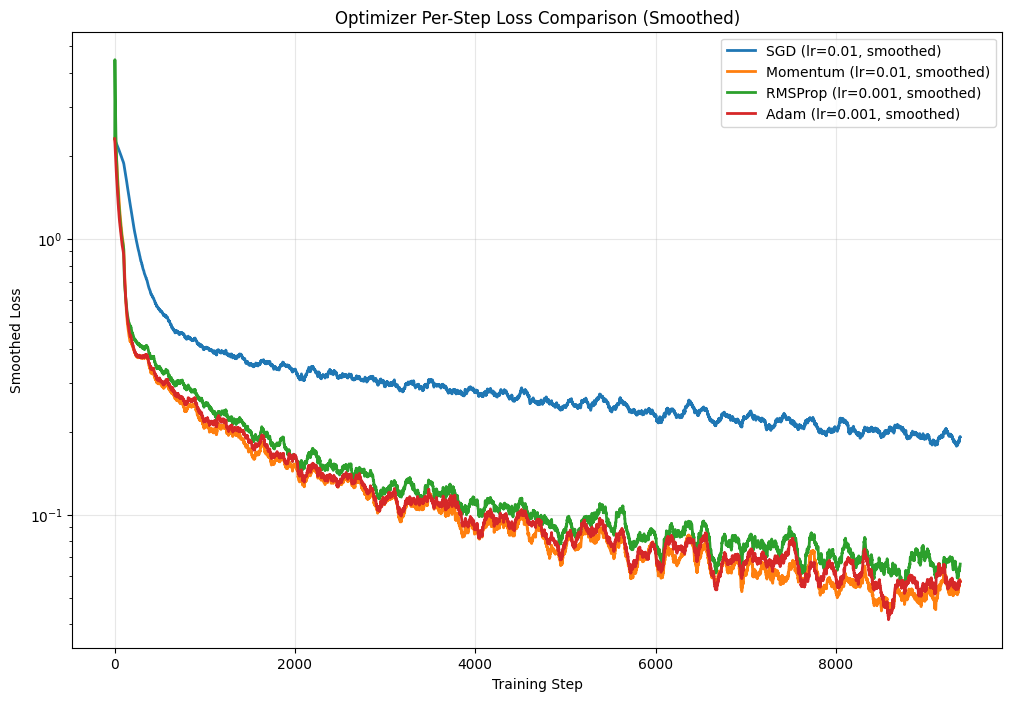

In [5]:
plt.figure(figsize=(12, 8))

# Learning rates for each optimizer (matching the test function)
learning_rates = {
    "SGD": 0.01,
    "Momentum": 0.01,
    "RMSProp": 0.001,
    "Adam": 0.001
}

# Plot per-step losses
for name, loss_list in results.items():
    lr = learning_rates.get(name, "unknown")
    plt.plot(range(1, len(loss_list) + 1), loss_list, label=f'{name} (lr={lr})', alpha=0.7)

plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.title('Optimizer Per-Step Loss Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Use log scale to better visualize the convergence
plt.show()

# Also create a smoothed version for better visualization
plt.figure(figsize=(12, 8))

def smooth_losses(losses, window=100):
    """Apply moving average smoothing"""
    if len(losses) < window:
        return losses
    smoothed = []
    for i in range(len(losses)):
        start_idx = max(0, i - window + 1)
        smoothed.append(sum(losses[start_idx:i+1]) / (i - start_idx + 1))
    return smoothed

for name, loss_list in results.items():
    lr = learning_rates.get(name, "unknown")
    smoothed = smooth_losses(loss_list)
    plt.plot(range(1, len(smoothed) + 1), smoothed, label=f'{name} (lr={lr}, smoothed)', linewidth=2)

plt.xlabel('Training Step')
plt.ylabel('Smoothed Loss')
plt.title('Optimizer Per-Step Loss Comparison (Smoothed)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

In [ ]:
def test_optimizers(seed=0):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
    train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

    class Net(nn.Module):
        def __init__(self):
            super().__init__()
            self.fc1 = nn.Linear(28*28, 128)
            self.relu = nn.ReLU()
            self.fc2 = nn.Linear(128, 10)

        def forward(self, x):
            x = x.view(x.size(0), -1)
            return self.fc2(self.relu(self.fc1(x)))

    step_losses = {}  # Changed from losses to step_losses
    optim_classes = {
        "SGD": lambda params: SGD(list(params), learning_rate=0.01),
        "Momentum": lambda params: SGDMomentum(list(params), learning_rate=0.01, beta=0.9),
        "RMSProp": lambda params: RMSProp(list(params), learning_rate=0.01, beta2=0.99),
        "Adam": lambda params: Adam(list(params), learning_rate=0.01, beta1=0.9, beta2=0.999)
    }

    for name, opt_fn in optim_classes.items():
        print(f"\n=== Testing {name} ===")
        torch.manual_seed(seed)
        model = Net()
        criterion = nn.CrossEntropyLoss()
        optimizer = opt_fn(model.parameters())

        step_losses[name] = []  # Track per-step losses
        step_count = 0
        
        for epoch in range(10):
            epoch_losses = []
            for images, labels in train_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)

                # backward
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

                # Store per-step loss
                step_loss = loss.item()
                step_losses[name].append(step_loss)
                epoch_losses.append(step_loss)
                step_count += 1

            # Print epoch summary
            avg_epoch_loss = sum(epoch_losses) / len(epoch_losses)
            print(f"Epoch {epoch+1}: Avg Loss = {avg_epoch_loss:.4f}, Steps = {len(epoch_losses)}")

    return step_losses


results = test_optimizers()
print(f"\nTotal steps per optimizer: {len(list(results.values())[0])}")
print("Final step losses:")
for name, losses in results.items():
    print(f"  {name}: {losses[-1]:.4f}")


=== Testing SGD ===
Epoch 1: Avg Loss = 0.7501, Steps = 938
Epoch 2: Avg Loss = 0.3669, Steps = 938
Epoch 3: Avg Loss = 0.3211, Steps = 938
Epoch 4: Avg Loss = 0.2939, Steps = 938
Epoch 5: Avg Loss = 0.2722, Steps = 938
Epoch 6: Avg Loss = 0.2530, Steps = 938
Epoch 7: Avg Loss = 0.2354, Steps = 938
Epoch 8: Avg Loss = 0.2202, Steps = 938
Epoch 9: Avg Loss = 0.2063, Steps = 938
Epoch 10: Avg Loss = 0.1944, Steps = 938

=== Testing Momentum ===
Epoch 1: Avg Loss = 0.3695, Steps = 938
Epoch 2: Avg Loss = 0.1818, Steps = 938
Epoch 3: Avg Loss = 0.1344, Steps = 938
Epoch 4: Avg Loss = 0.1077, Steps = 938
Epoch 5: Avg Loss = 0.0896, Steps = 938
Epoch 6: Avg Loss = 0.0789, Steps = 938
Epoch 7: Avg Loss = 0.0703, Steps = 938
Epoch 8: Avg Loss = 0.0621, Steps = 938
Epoch 9: Avg Loss = 0.0574, Steps = 938
Epoch 10: Avg Loss = 0.0517, Steps = 938

=== Testing RMSProp ===
Epoch 1: Avg Loss = 1.3667, Steps = 938
Epoch 2: Avg Loss = 0.3443, Steps = 938
Epoch 3: Avg Loss = 0.3038, Steps = 938
Epoch 

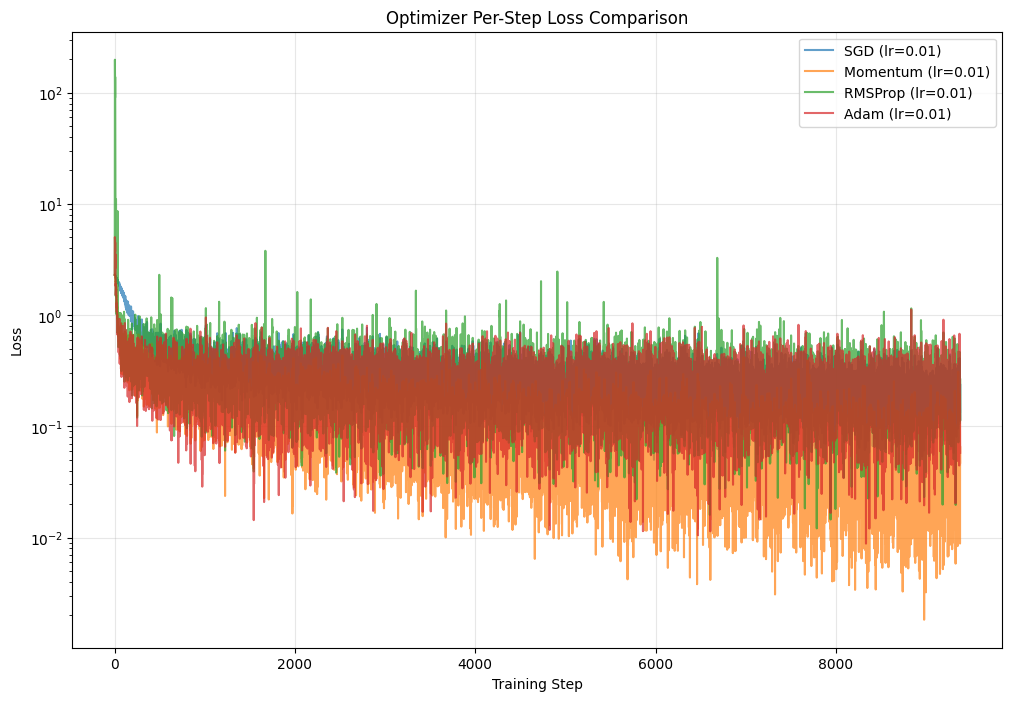

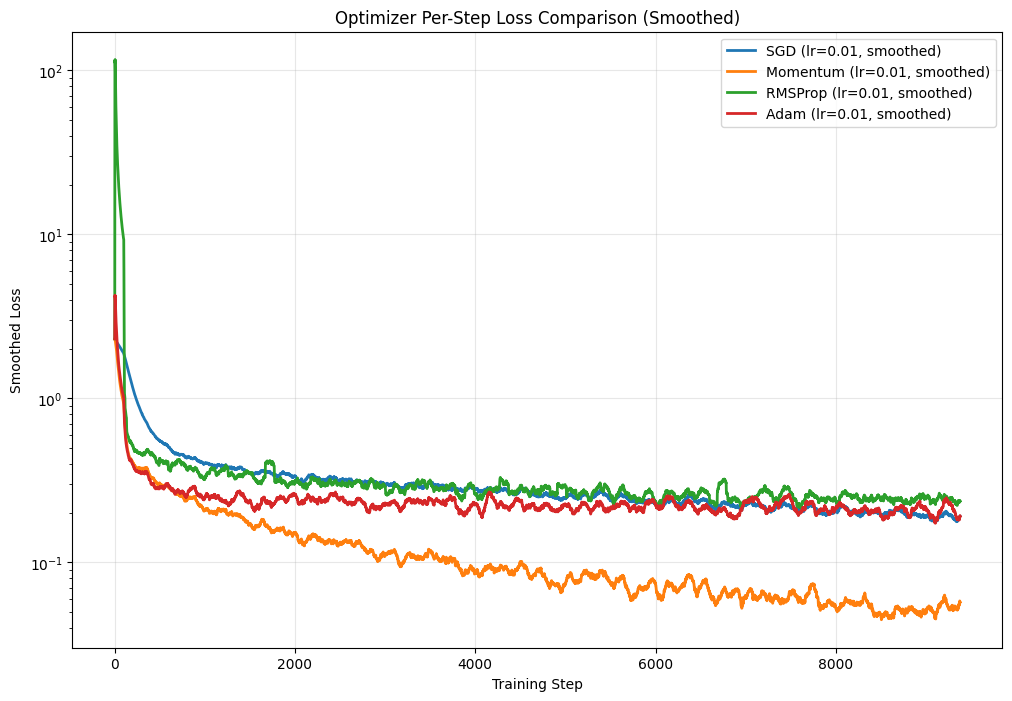

In [7]:
plt.figure(figsize=(12, 8))

# Learning rates for each optimizer (matching the test function)
learning_rates = {
    "SGD": 0.01,
    "Momentum": 0.01,
    "RMSProp": 0.01,
    "Adam": 0.01
}

# Plot per-step losses
for name, loss_list in results.items():
    lr = learning_rates.get(name, "unknown")
    plt.plot(range(1, len(loss_list) + 1), loss_list, label=f'{name} (lr={lr})', alpha=0.7)

plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.title('Optimizer Per-Step Loss Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Use log scale to better visualize the convergence
plt.show()

# Also create a smoothed version for better visualization
plt.figure(figsize=(12, 8))

def smooth_losses(losses, window=100):
    """Apply moving average smoothing"""
    if len(losses) < window:
        return losses
    smoothed = []
    for i in range(len(losses)):
        start_idx = max(0, i - window + 1)
        smoothed.append(sum(losses[start_idx:i+1]) / (i - start_idx + 1))
    return smoothed

for name, loss_list in results.items():
    lr = learning_rates.get(name, "unknown")
    smoothed = smooth_losses(loss_list)
    plt.plot(range(1, len(smoothed) + 1), smoothed, label=f'{name} (lr={lr}, smoothed)', linewidth=2)

plt.xlabel('Training Step')
plt.ylabel('Smoothed Loss')
plt.title('Optimizer Per-Step Loss Comparison (Smoothed)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()

In [ ]:
def test_optimizers(seed=0):
    transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
    train_data = datasets.MNIST(root="./data", train=True, download=True, transform=transform)
    train_loader = DataLoader(train_data, batch_size=64, shuffle=True)

    class Net(nn.Module):
        def __init__(self):
            super().__init__()
            self.fc1 = nn.Linear(28*28, 128)
            self.relu = nn.ReLU()
            self.fc2 = nn.Linear(128, 10)

        def forward(self, x):
            x = x.view(x.size(0), -1)
            return self.fc2(self.relu(self.fc1(x)))

    step_losses = {}  # Changed from losses to step_losses
    optim_classes = {
        "SGD": lambda params: SGD(list(params), learning_rate=0.1),
        "Momentum": lambda params: SGDMomentum(list(params), learning_rate=0.01, beta=0.9),
        "RMSProp": lambda params: RMSProp(list(params), learning_rate=0.001, beta2=0.99),
        "Adam": lambda params: Adam(list(params), learning_rate=0.001, beta1=0.9, beta2=0.999)
    }

    for name, opt_fn in optim_classes.items():
        print(f"\n=== Testing {name} ===")
        torch.manual_seed(seed)
        model = Net()
        criterion = nn.CrossEntropyLoss()
        optimizer = opt_fn(model.parameters())

        step_losses[name] = []  # Track per-step losses
        step_count = 0
        
        for epoch in range(10):
            epoch_losses = []
            for images, labels in train_loader:
                outputs = model(images)
                loss = criterion(outputs, labels)

                # backward
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()

                # Store per-step loss
                step_loss = loss.item()
                step_losses[name].append(step_loss)
                epoch_losses.append(step_loss)
                step_count += 1

            # Print epoch summary
            avg_epoch_loss = sum(epoch_losses) / len(epoch_losses)
            print(f"Epoch {epoch+1}: Avg Loss = {avg_epoch_loss:.4f}, Steps = {len(epoch_losses)}")

    return step_losses


results = test_optimizers()
print(f"\nTotal steps per optimizer: {len(list(results.values())[0])}")
print("Final step losses:")
for name, losses in results.items():
    print(f"  {name}: {losses[-1]:.4f}")


=== Testing SGD ===
Epoch 1: Avg Loss = 0.3906, Steps = 938
Epoch 2: Avg Loss = 0.1767, Steps = 938
Epoch 3: Avg Loss = 0.1310, Steps = 938
Epoch 4: Avg Loss = 0.1060, Steps = 938
Epoch 5: Avg Loss = 0.0899, Steps = 938
Epoch 6: Avg Loss = 0.0794, Steps = 938
Epoch 7: Avg Loss = 0.0695, Steps = 938
Epoch 8: Avg Loss = 0.0627, Steps = 938
Epoch 9: Avg Loss = 0.0573, Steps = 938
Epoch 10: Avg Loss = 0.0501, Steps = 938

=== Testing Momentum ===
Epoch 1: Avg Loss = 0.3695, Steps = 938
Epoch 2: Avg Loss = 0.1818, Steps = 938
Epoch 3: Avg Loss = 0.1344, Steps = 938
Epoch 4: Avg Loss = 0.1077, Steps = 938
Epoch 5: Avg Loss = 0.0896, Steps = 938
Epoch 6: Avg Loss = 0.0789, Steps = 938
Epoch 7: Avg Loss = 0.0703, Steps = 938
Epoch 8: Avg Loss = 0.0621, Steps = 938
Epoch 9: Avg Loss = 0.0574, Steps = 938
Epoch 10: Avg Loss = 0.0517, Steps = 938

=== Testing RMSProp ===
Epoch 1: Avg Loss = 0.4029, Steps = 938
Epoch 2: Avg Loss = 0.2088, Steps = 938
Epoch 3: Avg Loss = 0.1512, Steps = 938
Epoch 

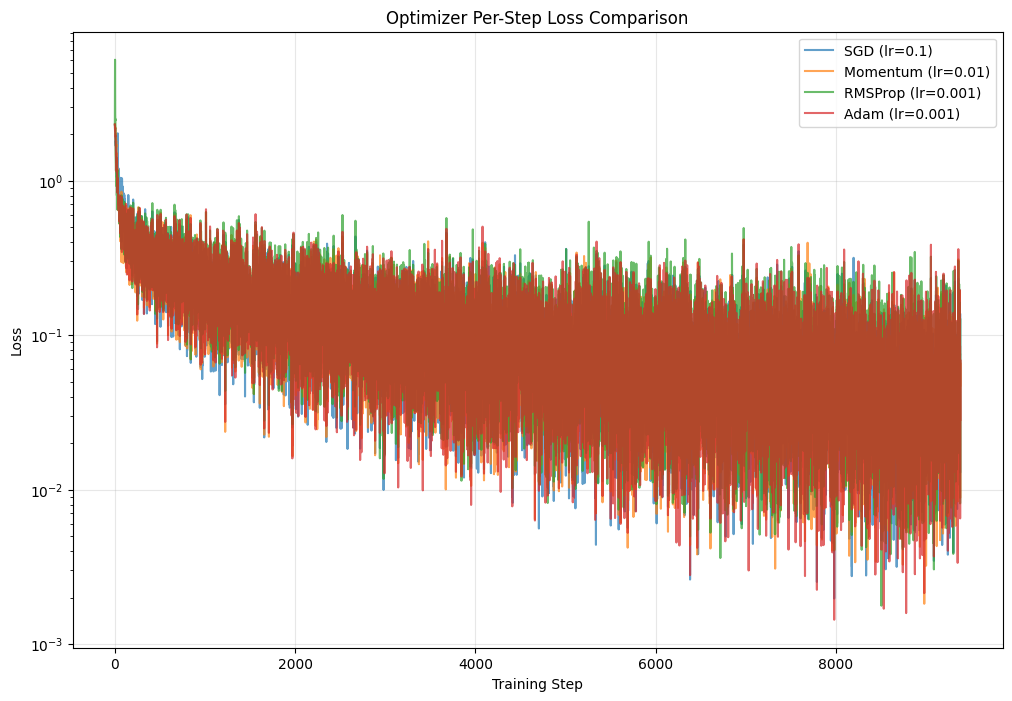

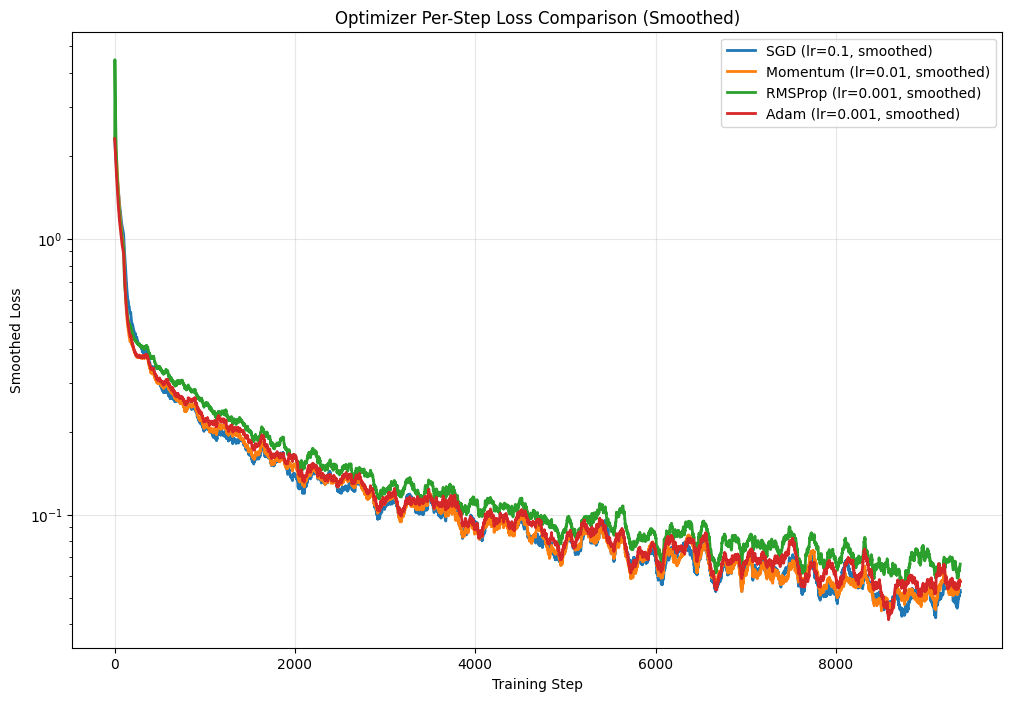

In [10]:
plt.figure(figsize=(12, 8))

# Learning rates for each optimizer (matching the test function)
learning_rates = {
    "SGD": 0.1,
    "Momentum": 0.01,
    "RMSProp": 0.001,
    "Adam": 0.001
}

# Plot per-step losses
for name, loss_list in results.items():
    lr = learning_rates.get(name, "unknown")
    plt.plot(range(1, len(loss_list) + 1), loss_list, label=f'{name} (lr={lr})', alpha=0.7)

plt.xlabel('Training Step')
plt.ylabel('Loss')
plt.title('Optimizer Per-Step Loss Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Use log scale to better visualize the convergence
plt.show()

# Also create a smoothed version for better visualization
plt.figure(figsize=(12, 8))

def smooth_losses(losses, window=100):
    """Apply moving average smoothing"""
    if len(losses) < window:
        return losses
    smoothed = []
    for i in range(len(losses)):
        start_idx = max(0, i - window + 1)
        smoothed.append(sum(losses[start_idx:i+1]) / (i - start_idx + 1))
    return smoothed

for name, loss_list in results.items():
    lr = learning_rates.get(name, "unknown")
    smoothed = smooth_losses(loss_list)
    plt.plot(range(1, len(smoothed) + 1), smoothed, label=f'{name} (lr={lr}, smoothed)', linewidth=2)

plt.xlabel('Training Step')
plt.ylabel('Smoothed Loss')
plt.title('Optimizer Per-Step Loss Comparison (Smoothed)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.show()